============================ Introduction to Gaussian Processes ============================

### Introduction to Gaussian Processes

This section introduces **Gaussian Processes (GPs)** as a Bayesian, non-parametric way of placing a prior directly over functions. GPs are fundamental in probabilistic modeling and provide a flexible alternative to parametric methods like neural networks or linear models.

#### What is a Gaussian Process?

A **Gaussian Process** defines a distribution over functions:

> A function $f(\mathbf{x})$ is said to follow a Gaussian Process if any finite collection of function values has a joint multivariate normal distribution.

Formally:
$$
f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}),\,k(\mathbf{x},\mathbf{x}'))
$$
Where:
- $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$ — **mean function**
- $k(\mathbf{x},\mathbf{x}') = \text{cov}(f(\mathbf{x}),f(\mathbf{x}'))$ — **covariance/kernel function**

So a GP is completely specified by a mean and a kernel.

#### Why Gaussian Processes?

##### Non-parametric view of functions

- Parametric models (e.g., linear regression) assume a fixed form with a finite number of parameters.
- GPs instead define a **probability distribution over the space of functions** itself.

This means:
- With more data, the GP can become more complex.
- It doesn’t fix the complexity a priori.

#### Core Components

##### 1. Mean Function $m(\mathbf{x})$

Typically assumed to be zero:  
$m(\mathbf{x}) = 0$
This simplifies analysis and practical implementation without loss of generality, because the kernel can absorb offsets anyway.

##### 2. Covariance Function $k(\mathbf{x},\mathbf{x}')$

The kernel encodes assumptions about:
- smoothness,
- stationarity,
- length scale,
- and generalization behavior.

Popular choices include:
- **Squared Exponential (RBF)**
- **Matern**
- **Periodic kernels**

Covariance determines how strongly correlated function values are at two inputs.

#### GP as a Prior Over Functions

Consider a set of inputs $\mathbf{X} = \{\mathbf{x}_1,\ldots,\mathbf{x}_n\}$.

A GP prior asserts:
$$
[f(\mathbf{x}_1),\,\ldots,\,f(\mathbf{x}_n)]^\top
\sim
\mathcal{N}(\mathbf{m},\,\mathbf{K}),
$$
where
- $\mathbf{m} = [m(\mathbf{x}_1),\ldots,m(\mathbf{x}_n)]^\top$
- $\mathbf{K}_{i,j}=k(\mathbf{x}_i,\mathbf{x}_j)$

This is a multivariate Gaussian over the function values.

#### Intuition Behind Gaussian Processes

##### Smoothness vs. flexibility

The **kernel function** controls:
- how quickly correlations decay with distance,
- how smooth the functions sampled from the GP are.

Example:
- RBF kernel → very smooth functions
- Matern kernel → rougher but still continuous functions

### Uncertainty as a first-class citizen

GPs provide **predictive uncertainty** automatically:
- near observed data → uncertainty low,
- far from data → uncertainty high.

This is due to conditioning a multivariate Gaussian.

#### Connection to Bayesian Inference

Given data $\{(\mathbf{x}_i,y_i)\}$:
- GP treats unknown function values at both observed and new inputs as jointly Gaussian.
- Inference is done by conditioning the joint distribution on observed data.

Result:
- A predictive mean function — the best guess for the true function
- A predictive variance — uncertainty at each prediction point

This gives a full **posterior distribution over functions**.

#### GP Regression View

GP regression predicts outputs as: $y_i = f(\mathbf{x}_i) + \varepsilon$
where \(\varepsilon\) is Gaussian noise.

The predictive distribution at a new input $\mathbf{x}_*$ is:
$$
f_* \mid \mathbf{X},\mathbf{y},\mathbf{x}_*
\sim
\mathcal{N}(\mu_*,\,\sigma_*^2),
$$
Where:
- $\mu_*$ comes from the kernel similarity with training points,
- $\sigma_*^2$ captures both noise and lack of nearby data.

#### Relation to Other Methods

##### Parametric Models
- Assume a fixed functional form $f(\mathbf{x}; \theta)$
- Parameters are inferred from data

##### GPs
- Function values themselves are random
- Model complexity grows with data instead of being fixed

GPs are thus more **flexible** and **uncertainty-aware**.

#### Practical Implications

- GPs work well for small to medium datasets where uncertainty matters (e.g., Bayesian optimization).
- Computational complexity is high for large datasets ($O(n^3)$) due to inversion of covariance matrices.
- Choice of kernel hyperparameters is crucial and often learned via marginal likelihood optimization.

#### Summary

- A **Gaussian Process** places a prior over functions rather than parameters.
- It is defined by mean and covariance functions.
- The kernel controls correlation and smoothness.
- Posterior predictions naturally come with uncertainty estimates.
- GPs excel in principled Bayesian modeling of functions when data is limited.

=========================== Gaussian Process Priors =========================

### Gaussian Process Priors

This section explains how **Gaussian Processes (GPs)** define prior distributions over functions via **mean** and **covariance (kernel) functions**, and how different kernel choices encode different assumptions about smoothness and structure.

#### 1. What a GP Prior Is

A GP prior places a probability distribution directly over the space of functions:

$$
f(\mathbf{x}) \sim \mathcal{GP}\big(m(\mathbf{x}),\,k(\mathbf{x},\mathbf{x}')\big)
$$

- $m(\mathbf{x})$: mean function  
- $k(\mathbf{x},\mathbf{x}')$: covariance (kernel) function

The prior defines how values $f(\mathbf{x})$ at any finite set of inputs relate to each other before seeing data.

#### 2. Mean Function

The **mean function** $m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})]$ describes expected function values under the prior.

In practice:
- It is often set to zero: $m(\mathbf{x}) = 0$
- Zero mean doesn’t imply functions are zero — the kernel controls variability.
- Any nonzero trend can be learned by incorporating it into the kernel or adding a separate parametric component.

This simplifies formulas without restricting expressiveness.

#### 3. Covariance (Kernel) Function

The **covariance function** $k(\mathbf{x},\mathbf{x}')$ encodes assumptions about
function behavior, such as smoothness, periodicity, and correlation length.

##### Formally
Given a set of inputs $\{\mathbf{x}_1,\ldots,\mathbf{x}_n\}$, the prior over the function values $\mathbf{f} = [f(\mathbf{x}_1),\ldots,f(\mathbf{x}_n)]^\top$ is: 

$$
\mathbf{f} \sim \mathcal{N}\!\big(\mathbf{m},\,\mathbf{K}\big)
$$

Where:
- $\mathbf{m} = [m(\mathbf{x}_1),\ldots,m(\mathbf{x}_n)]^\top$
- $\mathbf{K}$ is the covariance matrix with entries $\mathbf{K}_{ij} = k(\mathbf{x}_i,\mathbf{x}_j)$

The kernel determines the structure of $\mathbf{K}$ and therefore how correlated
function values at different inputs are under the prior.

#### 4. Example: Exponentiated Quadratic (RBF) Kernel

One of the most commonly used kernels:

$$
k_{\text{RBF}}(\mathbf{x},\mathbf{x}')
= \sigma^2 \exp\!\Big(-\frac{\|\mathbf{x}-\mathbf{x}'\|^2}{2\ell^2}\Big)
$$

- $\sigma^2$: variance (controls vertical scale)
- $\ell$: length-scale (controls horizontal smoothness)

Interpretation:
- Larger $\ell$: functions vary slowly (very smooth)
- Smaller $\ell$: functions vary quickly (wiggly)
- Far apart inputs → correlation goes to zero.

Together, $m(\mathbf{x})$ and $k_{\text{RBF}}$ define a function prior that favors smooth continuous functions.

#### 5. Visualizing the GP Prior

Under a GP prior, if you sample functions from:

$$
\mathbf{f} = [f(\mathbf{x}_1),\ldots,f(\mathbf{x}_n)]^\top
\sim \mathcal{N}(\mathbf{0},\,\mathbf{K})
$$

the draws look like:
- smooth wiggly curves if the RBF kernel is used
- rougher or structured curves if other kernels are chosen

Even before observing any data, the prior expresses beliefs about the shape of $f$.

#### 6. Kernel Encodes Inductive Bias

Choosing the kernel means choosing what kind of functions are *a priori* likely.  
Examples:

- **RBF kernel** → infinitely differentiable smooth functions
- **Matern kernel** → functions with controlled roughness
- **Periodic kernel** → functions that repeat

The kernel hyperparameters (e.g., $\ell,\sigma^2$) control:
- correlation strength
- characteristic length scale
- function amplitude

These are often learned from data (e.g., by maximizing marginal likelihood).

#### 7. Why Priors Matter

GP priors directly influence:
- how uncertainty changes with distance from observed points
- how quickly predictions revert to the prior mean
- the shape of the predictive mean–variance curves

Far from data:
- predictive variance → prior variance
- predictive mean → prior mean

This reflects increased uncertainty in regions without observations.

#### 8. Posterior with Observations (Preview)

Given data $(\mathbf{X}, \mathbf{y})$, the GP prior combines with the likelihood
to form a **posterior over functions**. The result is: $\text{Posterior mean and covariance}$

that interpolate smoothly between observed points — with uncertainty captured in
the posterior covariance.

Details are covered in the GP regression section of the chapter.

#### 9. Intuition vs. Parametric Models

Unlike parametric models with fixed numbers of parameters:
- GP priors define distributions over functions with potentially **infinite degrees of freedom**
- Complexity grows with data
- Uncertainty quantification is built in

GPs thus balance flexibility and Bayesian regularization via the kernel.

#### 10. Summary

- A **Gaussian Process prior** places a distribution over functions via a mean and kernel.
- The **kernel** encodes assumptions about correlation, smoothness, and generalization.
- GP priors control how functions behave *before* seeing any data.
- Hyperparameters of the kernel shape the prior and influence predictions after observing data.

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from d2l import torch as d2l

d2l.set_figsize()

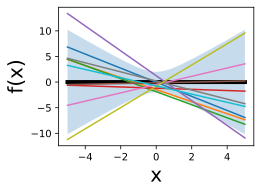

In [2]:
def lin_func(x, n_sample):
    preds = np.zeros((n_sample, x.shape[0]))
    for ii in range(n_sample):
        w = np.random.normal(0, 1, 2)
        y = w[0] + w[1] * x
        preds[ii, :] = y
    return preds

x_points = np.linspace(-5, 5, 50)
outs = lin_func(x_points, 10)
lw_bd = -2 * np.sqrt((1 + x_points ** 2))
up_bd = 2 * np.sqrt((1 + x_points ** 2))

d2l.plt.fill_between(x_points, lw_bd, up_bd, alpha=0.25)
d2l.plt.plot(x_points, np.zeros(len(x_points)), linewidth=4, color='black')
d2l.plt.plot(x_points, outs.T)
d2l.plt.xlabel("x", fontsize=20)
d2l.plt.ylabel("f(x)", fontsize=20)
d2l.plt.show()

In [ ]:
def rbfkernel(x1, x2, ls=4.):  #@save
    dist = distance_matrix(np.expand_dims(x1, 1), np.expand_dims(x2, 1))
    return np.exp(-(1. / ls / 2) * (dist ** 2))

x_points = np.linspace(0, 5, 50)
meanvec = np.zeros(len(x_points))
covmat = rbfkernel(x_points,x_points, 1)

prior_samples= np.random.multivariate_normal(meanvec, covmat, size=5);
d2l.plt.plot(x_points, prior_samples.T, alpha=0.5)
d2l.plt.show()

### Gaussian Process Inference

This section explains how to **do inference (prediction)** with Gaussian Processes (GPs), specifically how to compute the **posterior distribution** over function values at new inputs given observed data. The approach uses conditioning of multivariate Gaussian distributions.

#### 1. Setup: GP Prior Over Function Values

Suppose we have:

- training inputs: $\mathbf{X} = [\mathbf{x}_1,\ldots,\mathbf{x}_n]$
- observed function values: $\mathbf{f} = [f(\mathbf{x}_1),\ldots,f(\mathbf{x}_n)]$

Under a GP prior with mean function $m(\cdot)$ and covariance (kernel) function $k(\cdot,\cdot)$, the joint prior over training and test function values is:

$$
\begin{bmatrix}
\mathbf{f} \\ f_*
\end{bmatrix}
\sim
\mathcal{N}\!\left(
\begin{bmatrix}
\mathbf{m} \\ m(\mathbf{x}_*)
\end{bmatrix}
,\,
\begin{bmatrix}
\mathbf{K} & \mathbf{k}_* \\
\mathbf{k}_*^\top & k_{**}
\end{bmatrix}
\right)
$$

Where:
- $\mathbf{m} = [m(\mathbf{x}_1),\ldots,m(\mathbf{x}_n)]^\top$
- $\mathbf{K}$ is the $n\times n$ training covariance matrix
- $\mathbf{k}_* = [k(\mathbf{x}_1,\mathbf{x}_*),\ldots,k(\mathbf{x}_n,\mathbf{x}_*)]^\top$
- $k_{**} = k(\mathbf{x}_*,\mathbf{x}_*)$

This is the prior joint distribution over training and test function values.

## 2. Conditional Distribution of a Multivariate Gaussian

Key fact:

If
$$
\begin{bmatrix} \mathbf{a} \\ \mathbf{b} \end{bmatrix}
\sim
\mathcal{N}\Big(
\begin{bmatrix} \boldsymbol{\mu}_a \\ \boldsymbol{\mu}_b \end{bmatrix},
\begin{bmatrix}
\Sigma_{aa} & \Sigma_{ab}\\
\Sigma_{ba} & \Sigma_{bb}
\end{bmatrix}
\Big),
$$
then the conditional distribution $p(\mathbf{b}\mid\mathbf{a})$ is:

$$
\mathbf{b}\mid\mathbf{a}
\sim 
\mathcal{N}(\,
\boldsymbol{\mu}_b 
+ \Sigma_{ba}\Sigma_{aa}^{-1}(\mathbf{a}-\boldsymbol{\mu}_a),
\;
\Sigma_{bb}-\Sigma_{ba}\Sigma_{aa}^{-1}\Sigma_{ab}
\,)
$$

This identity is the basis of GP inference.

#### 3. Predictive Distribution of GP

By conditioning the joint Gaussian prior on observed function values, we obtain the **posterior predictive distribution** at a new input $\mathbf{x}_*$:

$$
f_* \mid \mathbf{X},\mathbf{f},\mathbf{x}_*
\sim
\mathcal{N}(\mu_*,\,\sigma_*^2)
$$

Where:

**Predictive mean:**
$$
\mu_*
= m(\mathbf{x}_*)
+ \mathbf{k}_*^\top \mathbf{K}^{-1}(\mathbf{f}-\mathbf{m})
$$

**Predictive variance:**
$$
\sigma_*^2
= k_{**} - \mathbf{k}_*^\top \mathbf{K}^{-1}\mathbf{k}_*
$$

These formulas show that:
- The predictive mean is a linear combination of the kernel similarities between the test point $\mathbf{x}_*$ and training points.
- The predictive variance shrinks near training data and approaches the prior variance far away.

#### 4. Observational Noise

If observations are noisy:

$$
y_i = f(\mathbf{x}_i) + \varepsilon,
\quad
\varepsilon \sim \mathcal{N}(0,\sigma_n^2),
$$

Then we replace the covariance matrix $\mathbf{K}$ with $\mathbf{K}+\sigma_n^2\mathbf{I}$ in the predictive equations:

**Mean:**
$$
\mu_*
= m(\mathbf{x}_*)
+ \mathbf{k}_*^\top(\mathbf{K}+\sigma_n^2\mathbf{I})^{-1}(\mathbf{y}-\mathbf{m})
$$

**Variance:**
$$
\sigma_*^2
= k_{**} - \mathbf{k}_*^\top(\mathbf{K}+\sigma_n^2\mathbf{I})^{-1}\mathbf{k}_*
$$

Noise increases predictive uncertainty and changes the effective influence of training points.

## 5. Insight from Predictive Formulas

### Influence of Training Points

- If $\mathbf{x}_*$ is close (in kernel distance) to training points, $\mathbf{k}_*$ is large and predictions rely heavily on data.
- If $\mathbf{x}_*$ is far from all training points, $\mathbf{k}_*$ is small → the posterior mean goes toward prior mean and variance toward prior variance.

### Uncertainty Quantification

Predictive variance captures two effects:
1. **kernel structure** (how smoothly outputs vary)
2. **data coverage** (distance to training points)

GPs thus give principled uncertainty estimates.

## 6. Matrix Form Perspective

For $m=|\mathbf{x}_*|$ new inputs $\mathbf{X}_*$, define:

- $\mathbf{K}_{**} = k(\mathbf{X}_*,\mathbf{X}_*)$
- $\mathbf{K}_* = k(\mathbf{X},\mathbf{X}_*)$
- $\mathbf{K}_*^\top = k(\mathbf{X}_*,\mathbf{X})$

Then the **joint predictive distribution** is:

$$
\begin{bmatrix}
\mathbf{f}\\
\mathbf{f}_*
\end{bmatrix}
\sim
\mathcal{N}
\left(
\begin{bmatrix}
\mathbf{m}\\
\mathbf{m}_*
\end{bmatrix},
\begin{bmatrix}
\mathbf{K} & \mathbf{K}_*\\
\mathbf{K}_*^\top & \mathbf{K}_{**}
\end{bmatrix}
\right)
$$

Conditioning yields vectorized formulas for the mean and covariance over all new inputs.

#### 7. Core Takeaways

- GP inference uses conditioning of joint Gaussians to compute posterior predictions.
- The predictive mean is a weighted combination of observed values.
- The predictive variance reflects both kernel structure and distance from training data.
- Observational noise is handled by inflating the covariance matrix.

#### 8. Why This Matters

GP inference gives:
- **closed-form expressions** for predictions
- **quantified uncertainty**
- **nonparametric adaptation** with more data

GPs thus provide a principled Bayesian approach to regression and uncertainty estimation without parametric assumptions.

In [ ]:
def data_maker1(x, sig):
    return np.sin(x) + 0.5 * np.sin(4 * x) + np.random.randn(x.shape[0]) * sig

sig = 0.25
train_x, test_x = np.linspace(0, 5, 50), np.linspace(0, 5, 500)
train_y, test_y = data_maker1(train_x, sig=sig), data_maker1(test_x, sig=0.)

d2l.plt.scatter(train_x, train_y)
d2l.plt.plot(test_x, test_y)
d2l.plt.xlabel("x", fontsize=20)
d2l.plt.ylabel("Observations y", fontsize=20)
d2l.plt.show()

In [ ]:
mean = np.zeros(test_x.shape[0])
cov = d2l.rbfkernel(test_x, test_x, ls=0.2)

In [ ]:
prior_samples = np.random.multivariate_normal(mean=mean, cov=cov, size=5)
d2l.plt.plot(test_x, prior_samples.T, color='black', alpha=0.5)
d2l.plt.plot(test_x, mean, linewidth=2.)
d2l.plt.fill_between(test_x, mean - 2 * np.diag(cov), mean + 2 * np.diag(cov),
                 alpha=0.25)
d2l.plt.show()

In [ ]:
ell_est = 0.4
post_sig_est = 0.5

def neg_MLL(pars):
    K = d2l.rbfkernel(train_x, train_x, ls=pars[0])
    kernel_term = -0.5 * train_y @ \
        np.linalg.inv(K + pars[1] ** 2 * np.eye(train_x.shape[0])) @ train_y
    logdet = -0.5 * np.log(np.linalg.det(K + pars[1] ** 2 * \
                                         np.eye(train_x.shape[0])))
    const = -train_x.shape[0] / 2. * np.log(2 * np.pi)

    return -(kernel_term + logdet + const)


learned_hypers = optimize.minimize(neg_MLL, x0=np.array([ell_est,post_sig_est]),
                                   bounds=((0.01, 10.), (0.01, 10.)))
ell = learned_hypers.x[0]
post_sig_est = learned_hypers.x[1]

In [ ]:
K_x_xstar = d2l.rbfkernel(train_x, test_x, ls=ell)
K_x_x = d2l.rbfkernel(train_x, train_x, ls=ell)
K_xstar_xstar = d2l.rbfkernel(test_x, test_x, ls=ell)

post_mean = K_x_xstar.T @ np.linalg.inv((K_x_x + \
                post_sig_est ** 2 * np.eye(train_x.shape[0]))) @ train_y
post_cov = K_xstar_xstar - K_x_xstar.T @ np.linalg.inv((K_x_x + \
                post_sig_est ** 2 * np.eye(train_x.shape[0]))) @ K_x_xstar

lw_bd = post_mean - 2 * np.sqrt(np.diag(post_cov))
up_bd = post_mean + 2 * np.sqrt(np.diag(post_cov))

d2l.plt.scatter(train_x, train_y)
d2l.plt.plot(test_x, test_y, linewidth=2.)
d2l.plt.plot(test_x, post_mean, linewidth=2.)
d2l.plt.fill_between(test_x, lw_bd, up_bd, alpha=0.25)
d2l.plt.legend(['Observed Data', 'True Function', 'Predictive Mean', '95% Set on True Func'])
d2l.plt.show()

In [ ]:
lw_bd_observed = post_mean - 2 * np.sqrt(np.diag(post_cov) + post_sig_est ** 2)
up_bd_observed = post_mean + 2 * np.sqrt(np.diag(post_cov) + post_sig_est ** 2)

In [ ]:
post_samples = np.random.multivariate_normal(post_mean, post_cov, size=20)
d2l.plt.scatter(train_x, train_y)
d2l.plt.plot(test_x, test_y, linewidth=2.)
d2l.plt.plot(test_x, post_mean, linewidth=2.)
d2l.plt.plot(test_x, post_samples.T, color='gray', alpha=0.25)
d2l.plt.fill_between(test_x, lw_bd, up_bd, alpha=0.25)
plt.legend(['Observed Data', 'True Function', 'Predictive Mean', 'Posterior Samples'])
d2l.plt.show()

In [ ]:
# First let's convert our data into tensors for use with PyTorch
train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)

# We are using exact GP inference with a zero mean and RBF kernel
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
# Initialize Gaussian likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)
training_iter = 50
# Find optimal model hyperparameters
model.train()
likelihood.train()
# Use the adam optimizer, includes GaussianLikelihood parameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# Set our loss as the negative log GP marginal likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

In [ ]:
for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    if i % 10 == 0:
        print(f'Iter {i+1:d}/{training_iter:d} - Loss: {loss.item():.3f} '
              f'squared lengthscale: '
              f'{model.covar_module.base_kernel.lengthscale.item():.3f} '
              f'noise variance: {model.likelihood.noise.item():.3f}')
    optimizer.step()

In [ ]:
# Get into evaluation (predictive posterior) mode
test_x = torch.tensor(test_x)
model.eval()
likelihood.eval()
observed_pred = likelihood(model(test_x))

In [ ]:
with torch.no_grad():
    # Initialize plot
    f, ax = d2l.plt.subplots(1, 1, figsize=(4, 3))
    # Get upper and lower bounds for 95\% credible set (in this case, in
    # observation space)
    lower, upper = observed_pred.confidence_region()
    ax.scatter(train_x.numpy(), train_y.numpy())
    ax.plot(test_x.numpy(), test_y.numpy(), linewidth=2.)
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), linewidth=2.)
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.25)
    ax.set_ylim([-1.5, 1.5])
    ax.legend(['True Function', 'Predictive Mean', 'Observed Data',
               '95% Credible Set'])